# Blitzortung

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import glob
import json
import requests

%pylab inline --no-import-all

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:

#lat=49.0640992 # Polednik
#lon=13.3950208

lat=50.1702058 # dalnice na KV
lon=13.7393756

start=pd.Timestamp('2022-05-20 19:11:38')
end=pd.Timestamp('2022-05-20 19:11:40')

BLITZ_DIST = 100      

print(start, end, lat, lon)

### url for json data preparation
url=[]

region=1
for i in range(0,int(np.ceil((end-start).total_seconds()/600)+1)):
    next=start+ pd.Timedelta(minutes=i*10)
    url.append('http://data.blitzortung.org/Data/Restricted/Strikes_%01d/%02d/%02d/%02d/%02d/%02d.json' % (region, next.year, next.month, next.day, next.hour, np.floor((next.minute)//10)*10))
region=18
for i in range(0,int(np.ceil((end-start).total_seconds()/600)+1)):
    next=start+ pd.Timedelta(minutes=i*10)
    url.append('http://data.blitzortung.org/Data/Restricted/Strikes_%01d/%02d/%02d/%02d/%02d/%02d.json' % (region, next.year, next.month, next.day, next.hour, np.floor((next.minute)//10)*10))
region=19
for i in range(0,int(np.ceil((end-start).total_seconds()/600)+1)):
    next=start+ pd.Timedelta(minutes=i*10)
    url.append('http://data.blitzortung.org/Data/Restricted/Strikes_%01d/%02d/%02d/%02d/%02d/%02d.json' % (region, next.year, next.month, next.day, next.hour, np.floor((next.minute)//10)*10))


blitz=pd.DataFrame()
for i in range(len(url)):
    #try:
    #html = requests.get(url[i]).content
    html = requests.get(url[i])
    print(url[i])

    htmlx = html.text.replace("}{", "},{" )
    blitz_part = pd.read_json(htmlx,lines=True)
    #blitz=blitz.append(blitz_part)
    blitz = pd.concat([blitz,blitz_part])
    #html = requests.get(url[i])
    #blitz_part = pd.read_json(html,lines=True)
    #blitz_part.drop(columns=['status','sig'], inplace=True)#,'region', 

    #except:
    #    print("No data", url[i])
    #    pass
blitz.set_index(['time'], inplace=True)

### reduction of too distant events
blitz=blitz[(blitz['lat']>(lat-2) )&(blitz['lat']<(lat+2) )]
blitz=blitz[(blitz['lon']>(lon-3.5) )&(blitz['lon']<(lon+3.5) )]

### calculation of distance of events from station
#from math import radians, cos, sin, asin, sqrt, atan2, degrees
try:
    blitz.drop(columns=['alt','pol','region'], inplace=True)
except:
    print('No columns to drop (alt, pol, region)')
    pass
#blitz['time']=blitz.index    
blitz['date'] = pd.to_datetime(blitz.index, unit='ns')
blitz.reset_index(inplace=True)
blitz.set_index('date', inplace=True)

blitz['lonRad']=np.radians(blitz.lon)
blitz['latRad']=np.radians(blitz.lat)
lonRad=np.radians(lon)
latRad=np.radians(lat)
blitz['DlonRad']=lonRad-blitz.lonRad
blitz['DlatRad']=latRad-blitz.latRad
blitz['a']=np.sin(blitz.DlatRad/2.)**2. + np.cos(blitz.latRad) * np.cos(latRad) * np.sin(blitz.DlonRad/2.)**2.
blitz['km'] = 2. * np.arcsin(np.sqrt(blitz.a))*6378.
blitz.drop(columns=['lonRad','latRad','DlonRad','DlatRad','a'], inplace=True)
try:
    blitz.drop(columns=['sig'], inplace=True)
except:
    print('No columns to drop (alt, pol, region)')
blitz = blitz.loc[blitz['km'] < BLITZ_DIST]
blitz['date'] = pd.to_datetime(blitz.index, unit='ns')
#blitz.reset_index(inplace=True)
#blitz.set_index('date', inplace=True)

#blitz.to_csv(dto + "/blitz.csv")

print('end')

2022-05-20 19:11:38 2022-05-20 19:11:40 50.1702058 13.7393756
http://data.blitzortung.org/Data/Restricted/Strikes_1/2022/05/20/19/10.json
http://data.blitzortung.org/Data/Restricted/Strikes_1/2022/05/20/19/20.json
http://data.blitzortung.org/Data/Restricted/Strikes_18/2022/05/20/19/10.json
http://data.blitzortung.org/Data/Restricted/Strikes_18/2022/05/20/19/20.json
http://data.blitzortung.org/Data/Restricted/Strikes_19/2022/05/20/19/10.json
http://data.blitzortung.org/Data/Restricted/Strikes_19/2022/05/20/19/20.json
end


/tmp/ipykernel_17843/4081458628.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  xx = blitz['2022-05-20 19:11:37':'2022-05-20 19:11:41']


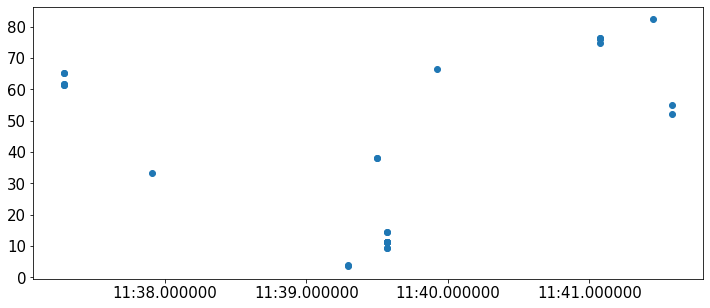

In [6]:
xx = blitz['2022-05-20 19:11:37':'2022-05-20 19:11:41']
plt.figure(figsize=(12,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(xx.index,xx['km'], marker='o', linestyle='')

In [7]:
xx

,time,lat,lon,mds,mcg,status,km,date
date,,,,,,,,
2022-05-20 19:11:41.079072534,1653073901079072534,49.497357,13.937806,11516,71,0,76.242520,2022-05-20 19:11:41.079072534
2022-05-20 19:11:41.079073082,1653073901079073082,49.510507,13.937013,8831,69,0,74.793799,2022-05-20 19:11:41.079073082
2022-05-20 19:11:41.079083643,1653073901079083643,49.501010,13.946812,5481,79,0,75.967090,2022-05-20 19:11:41.079083643
2022-05-20 19:11:41.079075181,1653073901079075181,49.501525,13.979970,13389,78,0,76.413567,2022-05-20 19:11:41.079075181
2022-05-20 19:11:41.451746559,1653073901451746559,49.446074,13.973329,9541,148,0,82.341607,2022-05-20 19:11:41.451746559
2022-05-20 19:11:41.582287159,1653073901582287159,50.518613,14.289824,7171,84,0,55.074731,2022-05-20 19:11:41.582287159
2022-05-20 19:11:41.587227431,1653073901587227431,50.489513,14.276426,11913,92,0,52.151897,2022-05-20 19:11:41.587227431
2022-05-20 19:11:37.286093183,1653073897286093183,50.553021,14.436123,5114,113,1,65.299345,2022-05-20 19:11:37.286093183
2022-05-20 19:11:37.286095385,1653073897286095385,50.532563,14.390348,11970,57,1,61.359002,2022-05-20 19:11:37.286095385
